In [1]:
from astropy.table import Table, Column
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
import os
import urllib.request
from tqdm import tqdm
import sys

In [2]:
os.chdir("/calvin1/benardorci/SimulationData")
os.getcwd()

'/calvin1/benardorci/SimulationData'

In [3]:
Halos = np.load("/calvin1/benardorci/SimulationData/halos.npy")
DMP = np.load("/calvin1/benardorci/SimulationData/dm_cat_ds_1000.npy")
CheckingEverythingIsAlright = 117

In [4]:
# MassBins, where:  

MassBin1 = []    #         MB < 1e13
MassBin2 = []    # 1e13 <= MB <5e13
MassBin3 = []    # 5e13 <= MB <1e14
MassBin4 = []    # 1e14 <= MB <5e14
MassBin5 = []    # 5e14 <= MB <1e15
MassBin6 = []    #         MB >= 1e15

for m, x, y, z, Vx, Vy, Vz in zip(Halos[:,0], Halos[:,1], Halos[:,2], Halos[:,3], Halos[:,4], Halos[:,5], Halos[:,6]) :
    if m >= 1.0*10**15 :
        MassBin1.append([m, x, y, z, Vx, Vy, Vz])
    elif m >= 5.0*10**14 :
        MassBin2.append([m, x, y, z, Vx, Vy, Vz])
    elif m >= 1.0*10**14 :
        MassBin3.append([m, x, y, z, Vx, Vy, Vz])
    elif m >= 5.0*10**13 :
        MassBin4.append([m, x, y, z, Vx, Vy, Vz])
    elif m >= 1.0*10**13 :
        MassBin5.append([m, x, y, z, Vx, Vy, Vz])
    else :
        MassBin6.append([m, x, y, z, Vx, Vy, Vz])

MassBin1 = np.array(MassBin1)
MassBin2 = np.array(MassBin2)
MassBin3 = np.array(MassBin3)
MassBin4 = np.array(MassBin4)
MassBin5 = np.array(MassBin5)
MassBin6 = np.array(MassBin6)

In [5]:
print(CheckingEverythingIsAlright)

117


In [6]:
Radius = 10
HalfHeight = 525

if ((Radius>525)&(HalfHeight>525)):
    sys.exit("The Shell will not be complete!")

NewDMPBoxShell = []

for m, x, y, z, Vx, Vy, Vz in zip(DMP[:,0], DMP[:,1], DMP[:,2], DMP[:,3], DMP[:,4], DMP[:,5], DMP[:,6]) :
    if  x < Radius :
        if y < Radius :
            if z < HalfHeight :
                NewDMPBoxShell.append([m, x+1050+Radius, y+1050+Radius, z+1050+HalfHeight, Vx, Vy, Vz]) #Vertice/Vertex
            elif z > 1050-HalfHeight :
                NewDMPBoxShell.append([m, x+1050+Radius, y+1050+Radius, z-1050+HalfHeight, Vx, Vy, Vz]) #Vertice/Vertex
            
        elif y > 1050-Radius :
            if z < HalfHeight :
                NewDMPBoxShell.append([m, x+1050+Radius, y-1050+Radius, z+1050+HalfHeight, Vx, Vy, Vz]) #Vertice/Vertex
            elif z > 1050-HalfHeight :
                NewDMPBoxShell.append([m, x+1050+Radius, y-1050+Radius, z-1050+HalfHeight, Vx, Vy, Vz]) #Vertice/Vertex
            
    elif  x > 1050-Radius :
        if y < Radius :
            if z < HalfHeight :
                NewDMPBoxShell.append([m, x-1050+Radius, y+1050+Radius, z+1050+HalfHeight, Vx, Vy, Vz]) #Vertice/Vertex
            elif z > 1050-HalfHeight :
                NewDMPBoxShell.append([m, x-1050+Radius, y+1050+Radius, z-1050+HalfHeight, Vx, Vy, Vz]) #Vertice/Vertex
            
        elif y > 1050-Radius :
            if z < HalfHeight :
                NewDMPBoxShell.append([m, x-1050+Radius, y-1050+Radius, z+1050+HalfHeight, Vx, Vy, Vz]) #Vertice/Vertex
            elif z > 1050-HalfHeight :
                NewDMPBoxShell.append([m, x-1050+Radius, y-1050+Radius, z-1050+HalfHeight, Vx, Vy, Vz]) #Vertice/Vertex

In [7]:
for m, x, y, z, Vx, Vy, Vz in zip(DMP[:,0], DMP[:,1], DMP[:,2], DMP[:,3], DMP[:,4], DMP[:,5], DMP[:,6]) :
    if  x < Radius :
        if y < Radius :    
            NewDMPBoxShell.append([m, x+1050+Radius, y+1050+Radius, z+HalfHeight, Vx, Vy, Vz]) #Arista/Edge        
        elif y > 1050-Radius :    
            NewDMPBoxShell.append([m, x+1050+Radius, y-1050+Radius, z+HalfHeight, Vx, Vy, Vz]) #Arista/Edge

    elif  x > 1050-Radius :
        if y < Radius :    
            NewDMPBoxShell.append([m, x-1050+Radius, y+1050+Radius, z+HalfHeight, Vx, Vy, Vz]) #Arista/Edge     
        elif y > 1050-Radius :    
            NewDMPBoxShell.append([m, x-1050+Radius, y-1050+Radius, z+HalfHeight, Vx, Vy, Vz]) #Arista/Edge

In [8]:
for m, x, y, z, Vx, Vy, Vz in zip(DMP[:,0], DMP[:,1], DMP[:,2], DMP[:,3], DMP[:,4], DMP[:,5], DMP[:,6]) :
    if y < Radius :
        if z < HalfHeight :
            NewDMPBoxShell.append([m, x+Radius, y+1050+Radius, z+1050+HalfHeight, Vx, Vy, Vz]) #Arista/Edge
        elif z > 1050-HalfHeight :
            NewDMPBoxShell.append([m, x+Radius, y+1050+Radius, z-1050+HalfHeight, Vx, Vy, Vz]) #Arista/Edge
        
    elif y > 1050-Radius :
        if z < HalfHeight :
            NewDMPBoxShell.append([m, x+Radius, y-1050+Radius, z+1050+HalfHeight, Vx, Vy, Vz]) #Arista/Edge
        elif z > 1050-HalfHeight :
            NewDMPBoxShell.append([m, x+Radius, y-1050+Radius, z-1050+HalfHeight, Vx, Vy, Vz]) #Arista/Edge

In [9]:
for m, x, y, z, Vx, Vy, Vz in zip(DMP[:,0], DMP[:,1], DMP[:,2], DMP[:,3], DMP[:,4], DMP[:,5], DMP[:,6]) :
    if  x < Radius :                
        if z < HalfHeight :
            NewDMPBoxShell.append([m, x+1050+Radius, y+Radius, z+1050+HalfHeight, Vx, Vy, Vz]) #Arista/Edge
        elif z > 1050-HalfHeight :
            NewDMPBoxShell.append([m, x+1050+Radius, y+Radius, z-1050+HalfHeight, Vx, Vy, Vz]) #Arista/Edge

    elif  x > 1050-Radius :
        if z < HalfHeight :
            NewDMPBoxShell.append([m, x-1050+Radius, y+Radius, z+1050+HalfHeight, Vx, Vy, Vz]) #Arista/Edge
        elif z > 1050-HalfHeight :
            NewDMPBoxShell.append([m, x-1050+Radius, y+Radius, z-1050+HalfHeight, Vx, Vy, Vz]) #Arista/Edge

In [10]:
for m, x, y, z, Vx, Vy, Vz in zip(DMP[:,0], DMP[:,1], DMP[:,2], DMP[:,3], DMP[:,4], DMP[:,5], DMP[:,6]) :
    if  x < Radius :
        NewDMPBoxShell.append([m, x+1050+Radius, y+Radius, z+HalfHeight, Vx, Vy, Vz]) #Cara/Face
            
    elif  x > 1050-Radius :
        NewDMPBoxShell.append([m, x-1050+Radius, y+Radius, z+HalfHeight, Vx, Vy, Vz]) #Cara/Face

In [11]:
for m, x, y, z, Vx, Vy, Vz in zip(DMP[:,0], DMP[:,1], DMP[:,2], DMP[:,3], DMP[:,4], DMP[:,5], DMP[:,6]) :
    if y < Radius :
        NewDMPBoxShell.append([m, x+Radius, y+1050+Radius, z+HalfHeight, Vx, Vy, Vz]) #Cara/Face
        
    elif y > 1050-Radius :
        NewDMPBoxShell.append([m, x+Radius, y-1050+Radius, z+HalfHeight, Vx, Vy, Vz]) #Cara/Face

In [12]:
for m, x, y, z, Vx, Vy, Vz in zip(DMP[:,0], DMP[:,1], DMP[:,2], DMP[:,3], DMP[:,4], DMP[:,5], DMP[:,6]) :
    if z < HalfHeight :
        NewDMPBoxShell.append([m, x+Radius, y+Radius, z+1050+HalfHeight, Vx, Vy, Vz]) #Cara/Face             
                  
    elif z > 1050-HalfHeight :
        NewDMPBoxShell.append([m, x+Radius, y+Radius, z-1050+HalfHeight, Vx, Vy, Vz]) #Cara/Face

In [13]:
DMP[:,1] = DMP[:,1] + Radius 
DMP[:,2] = DMP[:,2] + Radius 
DMP[:,3] = DMP[:,3] + HalfHeight

In [14]:
print(CheckingEverythingIsAlright)

117


In [15]:
NewDMPBox = np.concatenate((DMP, NewDMPBoxShell))

In [16]:
print(CheckingEverythingIsAlright)

117


In [17]:
ID = 0

FinalVelocities = []

for QQ in tqdm(MassBin1[:,0]) :
    
    # ------------------------------ Setting up limits of a box ------------------------------
    
    x0 = MassBin1[ID,1].item() + Radius
    y0 = MassBin1[ID,2].item() + Radius
    z0 = MassBin1[ID,3].item() + HalfHeight

    x0SupLim = x0+Radius
    x0InfLim = x0-Radius
    y0SupLim = y0+Radius
    y0InfLim = y0-Radius
    z0SupLim = z0+HalfHeight
    z0InfLim = z0-HalfHeight
    
    DMPBoxIndex = np.where((NewDMPBox[:,1] >= x0InfLim)&(NewDMPBox[:,1] <= x0SupLim)&(NewDMPBox[:,2] >= y0InfLim)&
                           (NewDMPBox[:,2] <= y0SupLim)&(NewDMPBox[:,3] >= z0InfLim)&(NewDMPBox[:,3] <= z0SupLim))[0]
    
    Box = np.zeros((np.size(np.where(DMPBoxIndex)),4))
                   
    Box[:,0] = NewDMPBox[DMPBoxIndex,1]
    Box[:,1] = NewDMPBox[DMPBoxIndex,2]
    Box[:,2] = NewDMPBox[DMPBoxIndex,3]
    Box[:,3] = NewDMPBox[DMPBoxIndex,6]
        
    #Box = np.array(Box)
    
    # ------------------------------ Setting up limits of a cylinder ------------------------------
    
    Delta = np.zeros((np.size(Box[:,0]),2))

    Delta[:,0]= Box[:,0]-x0
    Delta[:,1]= Box[:,1]-y0

    DistanceSquared = Delta[:,0]**2 + Delta[:,1]**2                          
                                                                             
    NewDMPBoxIndex = np.zeros((np.size(np.where(DistanceSquared<=np.power(Radius,2))),1))
    IndexNumbers = np.array(np.where(DistanceSquared<=np.power(Radius,2))[0])                 
    NewDMPBoxIndex[:,0] = IndexNumbers        
    
    Cylinder = np.zeros((np.size(IndexNumbers),4))
        
    Cylinder[:,0] = Box[IndexNumbers,0]
    Cylinder[:,1] = Box[IndexNumbers,1]
    Cylinder[:,2] = Box[IndexNumbers,2]
    Cylinder[:,3] = Box[IndexNumbers,3]
    
    MBElementVelocity = MassBin1[ID,6]
        
    # ------------------------------ Saving velocities on an array ------------------------------
    #
    # Note: If you wanted to also save the mass of the particles, add another column to the 'Box'
    # array (Box[:,4] = NewDMPBox[DMPBoxIndex,0])
    #
    #
    #
               
    FinalVelocities = np.append(FinalVelocities,Cylinder[:,3]-MBElementVelocity)
    
    ID = ID+1

100%|██████████| 398/398 [01:22<00:00,  4.50it/s]


In [18]:
########################################################################################################
#np.save("/calvin1/benardorci/MassBin3HistogramsDS1000Height2Radius0dot5.npy",FinalVelocities)

<function matplotlib.pyplot.show(*args, **kw)>

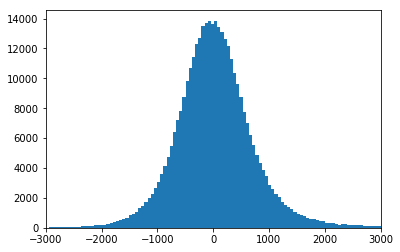

In [20]:
# ---------------------- Velocity in a cylinder relative to a Halo's velociy Histogram ----------------------

plt.hist(FinalVelocities, bins=200) #density=True
plt.xlim(-3000,3000)
plt.show
########################################################################################################
#plt.savefig("/calvin1/benardorci/MassBin3HistogramsDS1000Height2Radius0dot5.png")